In [92]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import sklearn
import math 
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
sns.set_style("darkgrid")

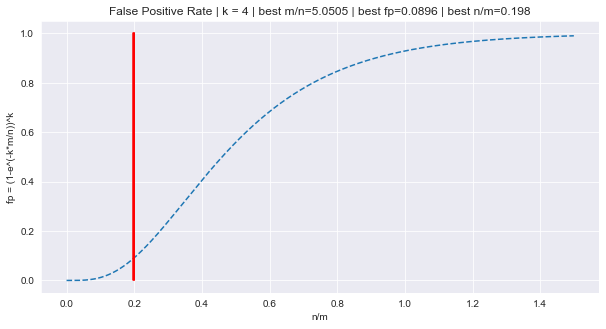

In [98]:
def best_ratio_for_hash_table(k=4):
    x_range = np.arange(0,1.5,0.001)
    y_range = []
    best_ratio = []
    best_fp = []
    for item in x_range:
        y_range.append((1-np.e**(-k*item))**k)
        if y_range[-1] <= 0.09 + 0.002 and y_range[-1] >= 0.09 - 0.002:
            best_ratio.append(round(item,4))
            best_fp.append(round(y_range[-1],4))
        
    best_ratio, best_fp = np.array(best_ratio,dtype=np.float64),np.array(best_fp,dtype=np.float64)
    best_index = np.argmin(np.abs(best_fp-0.09))    
    
    plt.plot(x_range,y_range,"--")
    plt.plot([best_ratio,best_ratio],[0,1],color="red")
    plt.title("False Positive Rate | k = 4 | best m/n={0} | best fp={1} | best n/m={2}".format(round(1/best_ratio[best_index],4),best_fp[best_index],round(best_ratio[best_index],4)))
    plt.ylabel("fp = (1-e^(-k*m/n))^k")
    plt.xlabel("n/m")
    plt.show()
    
    return best_ratio[best_index]
    
ratio = best_ratio_for_hash_table()
        


In [80]:
def IHash(S="",P=[17,31,47,61],M=10):
    C = []
    for char in S:
        C.append(ord(char))
    h = []
    C = np.array(C,dtype=np.float64)
    
    for p in P :
        hash_result = (np.min(C) + 
                       np.prod(C) * p + 
                       np.sum(C) * (p**(int(len(S)/2))) + 
                       np.max(C) * (p**(len(S)-1))) % M
        h.append(hash_result)
    return np.array(h,np.int64)
    
def IIHash(S="",P=[17,31,47,61],M=10):
    C = []
    for char in S:
        C.append(ord(char))
    
    #C = np.array(C,dtype=np.float64)
    h = []
    
    for p in P :
        hash_result = 0 
        for i in range(len(S)):
            hash_result += C[i] * (p**i)
        hash_result = hash_result % M   
        h.append(hash_result)
    return np.array(h,np.int64)




In [81]:
def ApplyHash(lenM,input_path="./user_dataset.csv"):
    BI = np.zeros(lenM,dtype=np.uint8)
    BII = np.zeros(lenM,dtype=np.uint8)
    dataset = pd.read_csv(input_path)
    usrs = list(dataset["UserNames"])
    
    for usr in tqdm(usrs):
        Iindexes = IHash(usr,M=lenM)
        BI[Iindexes] = 1
        
        IIindexes = IIHash(usr,M=lenM)
        BII[IIindexes] = 1
        
    return BI,BII

lenM = int(1/ratio * 1000000)
print(lenM)
BI,BII = ApplyHash(lenM)

5050505


100%|██████████| 1000000/1000000 [01:18<00:00, 12809.49it/s]


100%|██████████| 50000/50000 [00:04<00:00, 11881.77it/s]


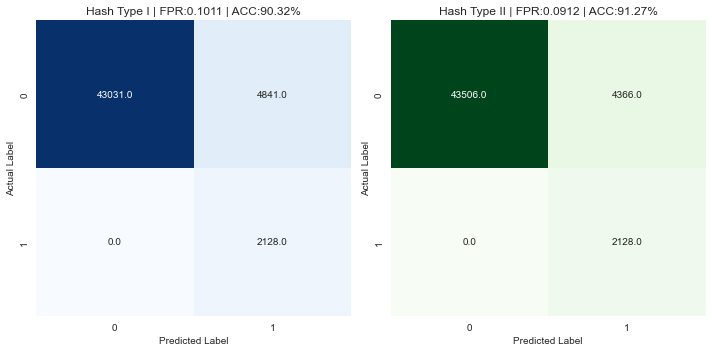

In [91]:
def Measure(BI,BII,lenM,input_path="./user_requests.csv"):
    dataset = pd.read_csv(input_path)
    usrs = list(dataset["UserNames"])
    real_y = list(dataset["Exist"])
    pred_I = []
    pred_II = []
    
    for usr in tqdm(usrs):
        Iindexes = IHash(usr,M=lenM)
        if np.all(BI[Iindexes]):
            pred_I.append(1)
        else:
            pred_I.append(0)
            
        IIindexes = IIHash(usr,M=lenM)
        if np.all(BII[IIindexes]):
            pred_II.append(1)
        else:
            pred_II.append(0)
    
    Icm = confusion_matrix(y_true=real_y,y_pred=pred_I)
    IIcm = confusion_matrix(y_true=real_y,y_pred=pred_II)
    plt.rcParams["figure.figsize"] = (10,5)
    
    def _plot(cm,i):
        FPR = round(cm[0,1]/(cm[0,1]+cm[0,0]),4)
        ACC = round(((cm[0,0]+cm[1,1])/(cm.flatten().sum()))*100,2)
        if i == "I":
            cs = "Blues"
        else:
            cs = "Greens"
        sns.heatmap(cm,cbar=False,annot=True,fmt=".1f",cmap=cs)
        plt.title("Hash Type {0} | FPR:{1} | ACC:{2}%".format(i,FPR,ACC))
        plt.ylabel("Actual Label")
        plt.xlabel("Predicted Label")

    plt.subplot(1,2,1)   
    _plot(Icm,"I")
    plt.subplot(1,2,2)   
    _plot(IIcm,"II")
    plt.tight_layout()
    plt.show()
        
    return pred_I,pred_II
    
    
pred_I,pred_II = Measure(BI,BII,lenM)

In [102]:
print("------- Hash Type I --------")
print("mohammadAli",IHash("mohammadAli",M=1000))
print("Alimohammad",IHash("Alimohammad",M=1000))
print("------- Hash Type II --------")
print("mohammadAli",IIHash("mohammadAli",M=1000))
print("Alimohammad",IIHash("Alimohammad",M=1000))
print("---------------")

------- Hash Type I --------
mohammadAli [816 152 568 792]
Alimohammad [816 152 568 792]
------- Hash Type II --------
mohammadAli [794 864 544 214]
Alimohammad [450 484 740 654]
---------------
